In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Write a path to the files and an empty df
path = glob.glob('raw_data/monthly/*/*.csv')
df = pd.DataFrame()

In [3]:
# Create merged df
x = 0
for filepath in path:
    name = filepath.split('/')
    readfile = pd.read_csv(filepath)
    df_x = pd.DataFrame(readfile)
    df_x['year'] = int(name[2])
    
    df = df.append(df_x, ignore_index=True)
    x += 1

In [4]:
df.head()

,sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,year
0,210,415,10,1857.75,818.52,1756.84,1.35,2017
1,351,16,10,1130.30,436.73,1072.17,1.35,2017
2,248,237,12,861.58,331.51,810.05,1.40,2017
3,353,375,12,1081.61,492.97,1008.97,1.43,2017
4,257,175,11,1979.68,582.71,1899.99,1.33,2017


In [5]:
# Change date format, count a number of rides
df1 = df[['month', 'year', 'dstid']].groupby(['year', 'month']).count().reset_index()
months = {1:('01',31), 2:('02',28), 3:('03',31), 4:('04',30), 5:('05',31), 6:('06',30),
          7:('07',31), 8:('08',31), 9:('09',30), 10:('10',31), 11:('11',30), 12:('12',31)}
for ind, row in df1.iterrows():
    df1.at[ind, 'mon'] = months[row['month']][0]
    df1.at[ind, 'date'] = ''
    df1.at[ind, 'uber_count'] = months[row['month']][1]
df1['date'] = df1['year'].astype(str) + df1['mon']
df1['uber_count'] = df1['dstid'] * df1['uber_count']
df1 = df1.drop(df1.columns[[0, 1, 2, 3]], axis=1)

In [16]:
# Export to csv
df1.to_csv('uber_monthly.csv', index=False)

In [9]:
df1.head()

,date,uber_count
0,201601,4336528.0
1,201602,4105444.0
2,201603,4731468.0
3,201604,4583160.0
4,201605,4918088.0


Text(0,0.5,'Average number of rides')

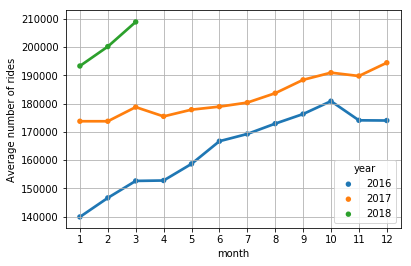

In [15]:
sns.pointplot(x='month', y='mean_travel_time', hue='year',
            data=(df[['mean_travel_time', 'month', 'year']].groupby(['month', 'year']).count().reset_index()), ci=None, markers='.')
plt.grid(True)
plt.ylabel('Average number of rides')